# **RECONHECIMENTO FACIAL COM FACE-RECOGNITION**

A biblioteca face-recognition em Python, construída sobre o dlib, é amplamente utilizada para reconhecimento facial e verificação de similaridade. Ela implementa métodos clássicos e baseados em deep learning para suas funcionalidades principais. Abaixo, detalho os principais métodos e técnicas envolvidos:

1. HOG (Histogram of Oriented Gradients):

- Método padrão para detecção de rostos na biblioteca.

- Analisa gradientes de intensidade na imagem para identificar padrões estruturais de faces.

- Equilibra velocidade e precisão, sendo eficaz em CPUs.

2. CNN (Convolutional Neural Network):

- Opção alternativa usando um modelo pré-treinado em deep learning (disponível via argumento model="cnn").

- Mais preciso que HOG, especialmente em imagens com variações de pose ou iluminação, mas demanda mais recursos computacionais (recomendado para GPUs).


## Codificação de Faces (Face Embeddings)

- ResNet-34:

    - A biblioteca usa uma rede neural residual (ResNet) pré-treinada, com 34 camadas, treinada no dataset FaceNet.

    - Converte cada face detectada em um vetor de 128 dimensões (embedding) que representa características únicas do rosto.

    - Essa codificação é invariante a variações como iluminação, expressões faciais leves e pequenas mudanças de ângulo.


## Verificação de Similaridade

- Distância Euclidiana:

    - Compara os embeddings de duas faces calculando a distância euclidiana entre os vetores de 128 dimensões.

    - Se a distância for menor que um threshold (geralmente 0.6, conforme definido empiricamente nos trabalhos originais do dlib), as faces são consideradas similares.


Comparação com Métodos Modernos
Embora a biblioteca face-recognition seja robusta para aplicações básicas, métodos mais recentes como ArcFace, FaceNet (com treinamento customizado) ou modelos baseados em Vision Transformers (ViTs) oferecem maior precisão em cenários complexos. No entanto, essas soluções geralmente exigem mais recursos e conhecimento para implementação.

In [ ]:
#pip install face-recognition #https://github.com/ageitgey/face_recognition

In [2]:
import face_recognition
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
#FUNÇÃO DE LEITURA DE IMAGEM

def imshow(titulo = 'Imagem', imagem = None, size = 10):
    w, h = imagem.shape[0], imagem.shape[1]
    aspect_ratio = w/h
    plt.Figure(figsize=(size * aspect_ratio, size))
    plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
    plt.title(titulo)
    plt.show()

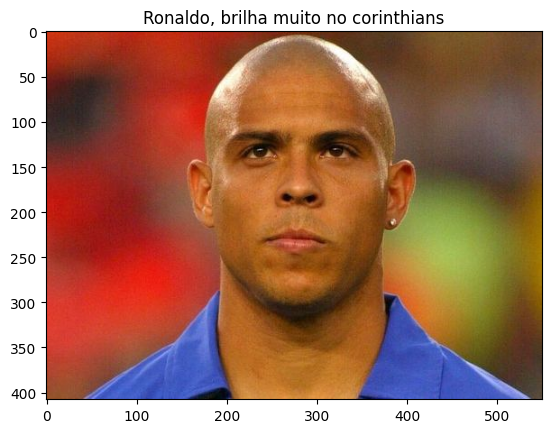

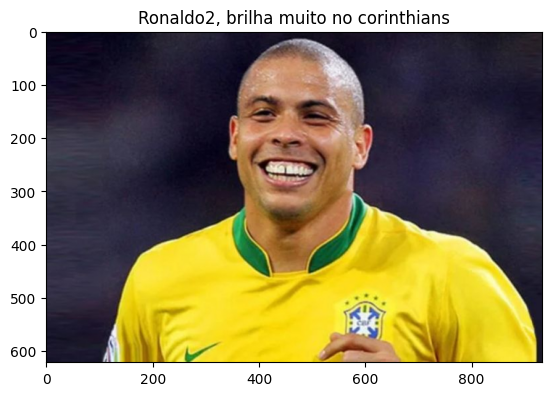

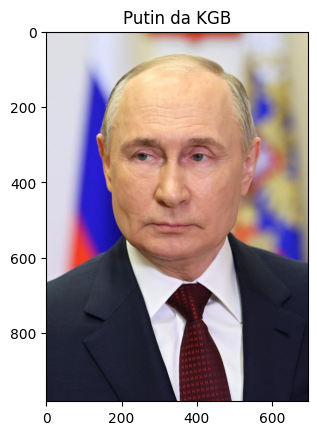

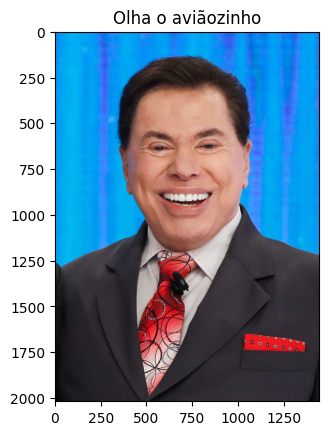

In [4]:
ronaldao = cv2.imread('../../images/ronaldo.jpg')
ronaldao2 = cv2.imread('../../images/ronaldo2.jpg')
putao = cv2.imread('../../images/putin.jpg')
silvao = cv2.imread('../../images/silvio.jpg')

imshow('Ronaldo, brilha muito no corinthians', ronaldao)
imshow('Ronaldo2, brilha muito no corinthians', ronaldao2)
imshow('Putin da KGB', putao)
imshow('Olha o aviãozinho', silvao)

In [5]:
#VAMOS CHECAR SIMILARIDADE ENTRE IMAGENS
ronaldo = face_recognition.load_image_file('../../images/ronaldo.jpg')
putin =  face_recognition.load_image_file('../../images/putin.jpg')

ronaldoEnconding = face_recognition.face_encodings(ronaldo)[0]
print(len(ronaldoEnconding))
#print(ronaldoEnconding)

putinEnconding = face_recognition.face_encodings(putin)[0]
#print(putinEnconding)

#PRIMEIRO ARGUMENTO É UMA LISTA DE FACES CONHECIDAS
# SEGUNDO ARGUMENTO É UM EMBEDDING DE UMA FACE  
comparacao = face_recognition.compare_faces([ronaldoEnconding], putinEnconding)
print(comparacao)
print(f'As faces são correspondentes: {comparacao[0]}')

128
[np.False_]
As faces são correspondentes: False


In [6]:
#VAMOS CHECAR SIMILARIDADE ENTRE IMAGENS
ronaldo = face_recognition.load_image_file('../../images/ronaldo.jpg')
ronaldo2 =  face_recognition.load_image_file('../../images/ronaldo2.jpg')

ronaldoEnconding = face_recognition.face_encodings(ronaldo)[0]
print(len(ronaldoEnconding))
#print(ronaldoEnconding)

ronald2Enconding = face_recognition.face_encodings(ronaldo2)[0]
#print(putinEnconding)

#PRIMEIRO ARGUMENTO É UMA LISTA DE FACES CONHECIDAS
# SEGUNDO ARGUMENTO É UM EMBEDDING DE UMA FACE  
comparacao = face_recognition.compare_faces([ronaldoEnconding], ronald2Enconding)
print(comparacao)
print(f'As faces são correspondentes: {comparacao[0]}')

128
[np.True_]
As faces são correspondentes: True


In [7]:
#VAMOS CHECAR SIMILARIDADE ENTRE IMAGENS
ronaldo = face_recognition.load_image_file('../../images/ronaldo.jpg')
silvio =  face_recognition.load_image_file('../../images/silvio.jpg')

ronaldoEnconding = face_recognition.face_encodings(ronaldo)[0]
print(len(ronaldoEnconding))
#print(ronaldoEnconding)

silvioEnconding = face_recognition.face_encodings(silvio)[0]
#print(putinEnconding)

#PRIMEIRO ARGUMENTO É UMA LISTA DE FACES CONHECIDAS
# SEGUNDO ARGUMENTO É UM EMBEDDING DE UMA FACE  
comparacao = face_recognition.compare_faces([ronaldoEnconding, ronald2Enconding, putinEnconding], silvioEnconding)
print(comparacao)
faces = ['Ronaldo', 'Ronaldo2', 'Putin', 'Silvio']
j = 0
for i in comparacao:
    print(f'A face escolhida é correspondentes com {faces[j]}: {comparacao[i]}')
    j += 1

128
[np.False_, np.False_, np.False_]
A face escolhida é correspondentes com Ronaldo: False
A face escolhida é correspondentes com Ronaldo2: False
A face escolhida é correspondentes com Putin: False


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11232\1184153455.py:19: DeprecationWarning: In future, it will be an error for 'np.bool' scalars to be interpreted as an index
  print(f'A face escolhida é correspondentes com {faces[j]}: {comparacao[i]}')


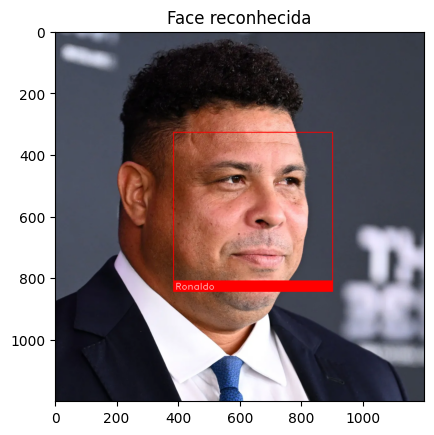

In [16]:
facesConhecidas = [ronaldoEnconding, ronald2Enconding, putinEnconding, silvioEnconding]
facesNomes = ['Ronaldo', 'Ronaldo2', 'Putin', 'Silvio']

# Definir uma lista para armazenar os locais das faces detectadas
face_locations = []
face_encodings = []
face_names = []
process_this_frame = True

silvio2 = cv2.imread('../../images/ronaldo4.png')

#Fazendo o processamento mais rápido, reduzindo o tamanho da entrada para 1/4

silvinho = cv2.resize(silvio2, (0,0), fx=0.25, fy=0.25)

#Inverter de BGR PARA RGB 

rgb = np.ascontiguousarray(silvinho[:, :, ::-1])

if process_this_frame:
    #Encontrar todas as faces neste frame

    face_locations = face_recognition.face_locations(rgb)
    face_encodings = face_recognition.face_encodings(rgb, face_locations)

    faceNames = []

    for enconding in face_encodings:
        #VAMOS VERIFICAR SE CADA FACE POSSUI ALGUMA CORRESPONDENCIA
        corresp = face_recognition.compare_faces(facesConhecidas, enconding)
        name = 'Desconhecido'
        
        """
        CALCULANDO A DISTANCIA ENTRE CADA FACE 

        distancias = face_recognition.face_distance(facesConhecidas, enconding)
        melhroCorresp = np.argmin(distancias)
        if corresp[melhroCorresp]:
            name = facesNomes[primeiro]

        """

        if True in corresp:
            primeiro = corresp.index(True)
            name = facesNomes[primeiro]

        faceNames.append(name)

for (top, right, bottom, left), name in zip(face_locations, faceNames):
    #Vamos reescalar de volta as dimensoes da imagem
    top *= 4
    right *= 4
    bottom *= 4
    left *= 4
    #DESENHANDO O BB
    cv2.rectangle(silvio2, (left, top), (right, bottom), (0, 0, 255), 2)
    #DESENHANDO O ROTULO
    cv2.rectangle(silvio2, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
    font = cv2.FONT_HERSHEY_DUPLEX
    cv2.putText(silvio2, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

imshow('Face reconhecida', silvio2)